# Online Payments Fraud Detection Project Utilizing Decision Tree Classifier

Online payments have become increasingly prevalent in modern commerce, but so too have fraudulent activities targeting these transactions. In response, the Online Payments Fraud Detection Project employs a Decision Tree Classifier, a powerful machine learning algorithm, to distinguish between legitimate transactions and fraudulent ones. By analyzing various features and patterns within transactional data, the Decision Tree Classifier can effectively identify suspicious behavior, enabling businesses to mitigate risks and safeguard their financial operations in the digital realm. This project represents a proactive approach to combatting fraud in online payments, ensuring the integrity and security of electronic transactions for businesses and consumers alike.

## Libraries

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

## Data Exploration
### Loading dataset
You can download the dataset using the following [link](https://www.kaggle.com/ealaxi/paysim1/download).

In [3]:
data=pd.read_csv("credit_card.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
data.shape

(6362620, 11)

Now, let's have a look at whether this dataset has any null values or not.

In [6]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


So this datset does not have any null values. Before moving forward, now, let's have a look at the type of transaction mentioned in the dataset.

In [7]:
# Exploring transaction type
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [8]:
type=data['type'].value_counts()
transactions=type.index
quantity=type.values

figure=px.pie(data,
              values=quantity,
              names=transactions, hole=0.5,
              title="Distribution of Transaction Type")
figure.show()

Now let's have a look at the correlation between the features of the data with the isFraud column.<br><br>
1. __Selecting Numerical Data:__ This line selects only the numerical columns from the DataFrame data using the `select_dtypes` method with the argument `include='number'`. It filters out non-numeric columns, leaving only those containing numerical data.

2. __Calculating Correlation:__ After selecting the numerical data, the code calculates the correlation matrix using the corr method. This matrix represents the pairwise correlations between all numerical columns in the dataset. Each cell in the matrix contains the correlation coefficient between the corresponding pair of features.

3. __Sorting Correlation Values:__ Finally, the code selects the column "isFraud" from the correlation matrix and sorts its correlation values in descending order using the `sort_values` method. This provides a ranked list of correlations between the "isFraud" variable and other numerical features in the dataset. A higher correlation value indicates a stronger linear relationship between the feature and the target variable "isFraud."


In [9]:
# Checking correlation
numeric_data=data.select_dtypes(include='number')
correlation=numeric_data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


Now let's transform the categorical features into numerical. Here I will also transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output.

In [10]:
data["type"]=data["type"].map({"CASH_OUT":1, "PAYMENT":2,
                               "CASH_IN":3, "TRANSFER":4,
                               "DEBIT":5})
data["isFraud"]=data["isFraud"].map({0:"No Fraud", 1:"Fraud"})

data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No Fraud,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No Fraud,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No Fraud,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No Fraud,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No Fraud,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No Fraud,0


## Online Payments Fraud Detection Model
Now let's train a classification model to classify fraud and non-fraud transactions. Before training the model, I will split the data into training and test sets.

In [11]:
# Splitting the data
x=np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y=np.array(data[["isFraud"]])

##### Now let's train the online payments fraud detection model
This code segment is a typical workflow for training and evaluating a machine learning model, specifically a Decision Tree Classifier, using the train_test_split function for data splitting, fitting the model, and assessing its performance.

Here's a breakdown of the code:
1. __Data Splitting:__ This line of code is splitting the dataset x and corresponding labels y into training and testing sets. The train_test_split function is used for this purpose. It splits the data into two sets based on the specified `test_size`, which is set to 0.15 here, indicating that 15% of the data will be used for testing, and the remaining 85% will be used for training. The random_state parameter is set to 42 to ensure reproducibility, meaning the split will be the same each time the code is run.
2. __Model Initialization and Training:__ After splitting the data, a Decision Tree Classifier model is initialized without any custom parameters. Then, the model is trained using the training data `(X_train and y_train)` by calling the fit method. This step involves the model learning patterns and relationships in the training data.
3. __Model Evaluation:__ Finally, the trained model's performance is evaluated on the testing data `(X_test and y_test)`. The score method calculates the accuracy of the model on the test data, which is the proportion of correctly classified instances out of all instances in the test set. The result is printed to the console.

In [12]:
# Training a Ml model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9997307188967228


Once trained, I can plot the tree with the `plot_tree` function:

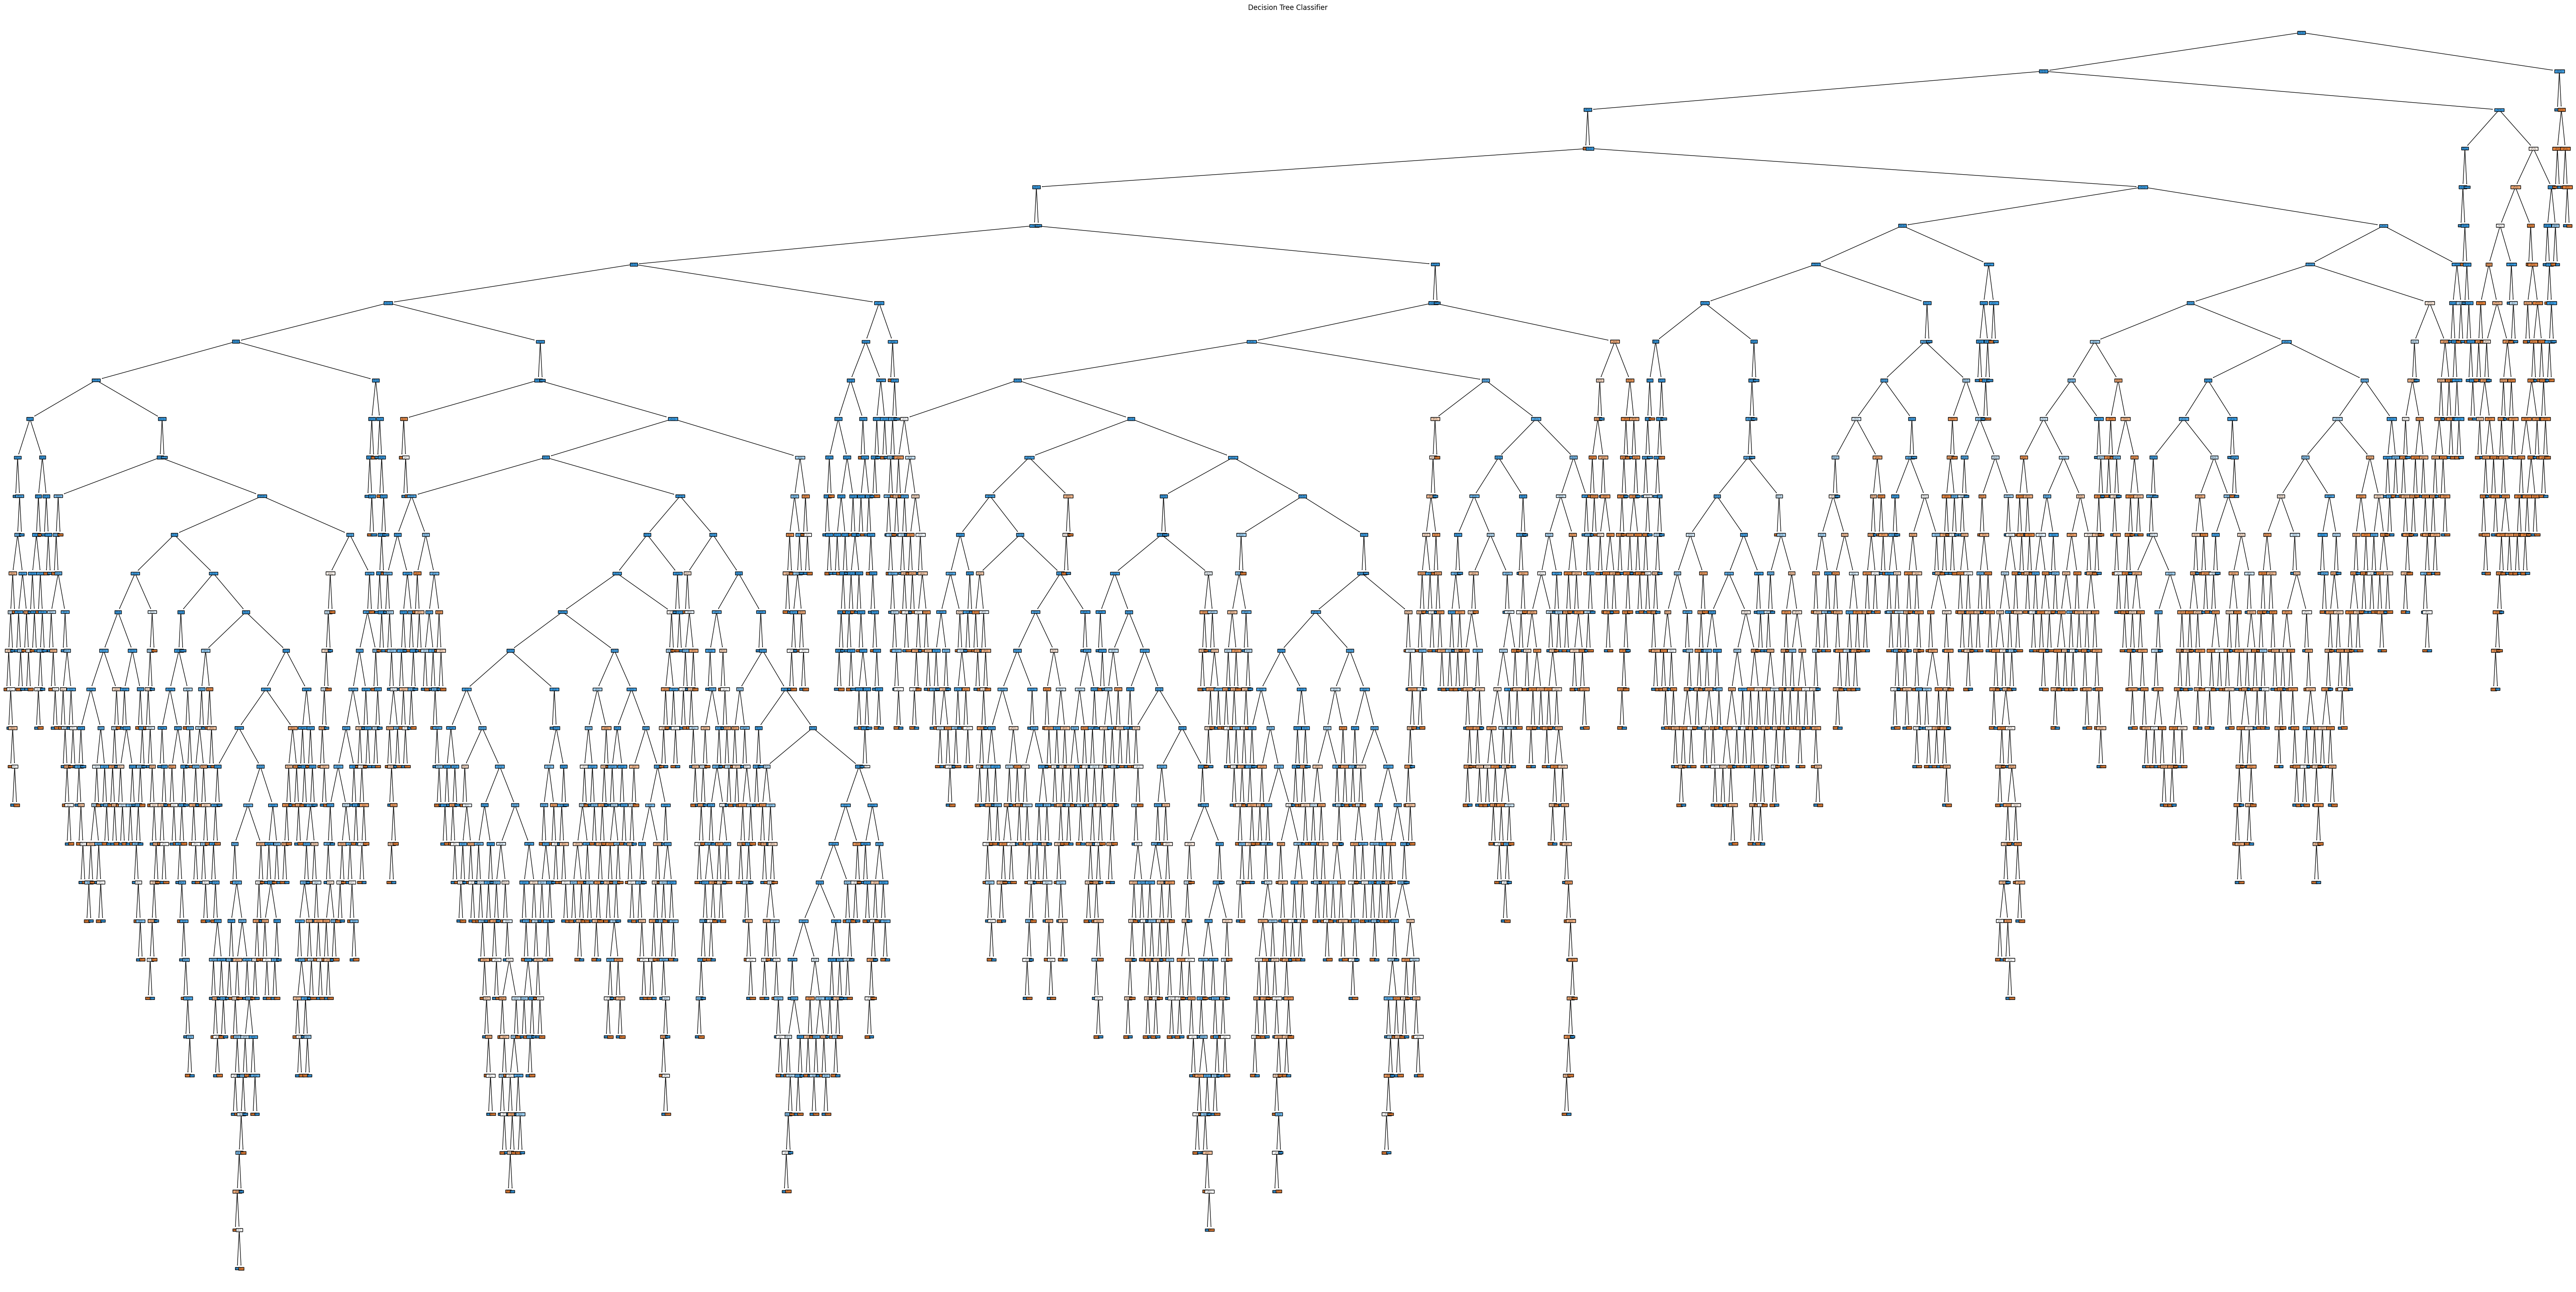

In [22]:
# Plot decision tree
plt.figure(figsize=(80, 40))
plot_tree(model, filled=True, feature_names=["type", "amount", "oldbalanceOrg", "newbalanceOrig"], class_names=["Not Fraud", "Fraud"])
plt.title("Decision Tree Classifier")
plt.show()

Save the figure as an image file

In [20]:
plt.savefig('decision_tree.png')

<Figure size 640x480 with 0 Axes>

Now let's classify wehther a transction is a fraud or not by feeding about a transaction into the model.

In [19]:
# Prediction
# features=[type, amount, oldbalanceOrg, newbalanceOrig]
features=np.array([[4, 9000.60, 9350.75, 0.0]])
print(model.predict(features))

['Fraud']
